In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", palette="dark")

# Loading and Transformations


The first dataset contains our target variable which is hdi, we have hdi data from previous years and the percentage growth among with information regarding population, density and area

In [2]:
df_humanDevelopment=pd.read_csv('./hd_index.csv', on_bad_lines='skip')
df_humanDevelopment.head(5)

,place,pop2023,growthRate,area,country,cca3,cca2,ccn3,region,subregion,...,densityMi,Rank,hdiTier,hdi2021,hdi2020,hdi2019,hdi2010,hdi2000,hdiGrowth,rank
0,756,8796669,0.00643,41284.0,Switzerland,CHE,CH,756,Europe,Western Europe,...,576.5607,101,Very High,0.962,0.956,0.962,0.942,0.887,0.40,1
1,578,5474360,0.00737,323802.0,Norway,NOR,NO,578,Europe,Northern Europe,...,38.9217,119,Very High,0.961,0.959,0.961,0.941,0.913,0.44,2
2,352,375318,0.00649,103000.0,Iceland,ISL,IS,352,Europe,Northern Europe,...,9.6407,179,Very High,0.959,0.957,0.960,0.902,0.871,0.54,3
3,344,7491609,0.00037,1104.0,Hong Kong,HKG,HK,344,Asia,Eastern Asia,...,18479.3022,104,Very High,0.952,0.949,0.952,0.907,0.851,0.61,4
4,36,26439111,0.01000,7692024.0,Australia,AUS,AU,36,Oceania,Australia and New Zealand,...,8.9024,55,Very High,0.951,0.947,0.941,0.923,0.896,0.31,5


In [3]:
df_humanDevelopment.drop(columns=['hdi2020','hdi2019','hdi2010','hdi2000', 'hdiGrowth', 'cca2','ccn3'], inplace=True)

In [4]:
df_humanDevelopment.shape

(96, 15)

The following datasets contain attributes related to the countries that may have an impact on the HDI, some of them are included in the calculation made by the United Nations, but I want to know the impact of other variables such as gender equality, living costs, education level, GDP per capita, among others.

In [5]:
#Education level by country
df_literacyRate=pd.read_csv('./literacyRate.csv', on_bad_lines='skip')
df_literacyRate.head()

,place,pop2023,growthRate,area,country,cca3,cca2,ccn3,region,subregion,landAreaKm,density,densityMi,Rank,latestRate,dataYear,rank
0,246,5545475.0,0.00085,338424.0,Finland,FIN,FI,246,Europe,Northern Europe,303940.0,18.2453,47.2553,118,100.0,2000,1
1,578,5474360.0,0.00737,323802.0,Norway,NOR,NO,578,Europe,Northern Europe,364285.0,15.0277,38.9217,119,100.0,2011,2
2,442,654768.0,0.01107,2586.0,Luxembourg,LUX,LU,442,Europe,Western Europe,2574.5,254.3282,658.7101,168,100.0,2000,3
3,20,80088.0,0.00331,468.0,Andorra,AND,AD,20,Europe,Southern Europe,470.0,170.4000,441.3360,203,100.0,2011,4
4,304,56643.0,0.00314,2166086.0,Greenland,GRL,GL,304,North America,Northern America,410450.0,0.1380,0.3574,208,100.0,2001,5


In [6]:
##Removing the columns that repeat
df_literacyRate.drop(columns=['dataYear','rank','place', 'pop2023', 'growthRate', 'area','cca3', 'cca2','ccn3', 'region', 'subregion', 'landAreaKm', 'density', 'densityMi', 'Rank'], inplace=True)
df_literacyRate.head()

,country,latestRate
0,Finland,100.0
1,Norway,100.0
2,Luxembourg,100.0
3,Andorra,100.0
4,Greenland,100.0


In [7]:
df_literacyRate.shape

(112, 2)

In [8]:
##Gender Equality by country (removing innecesary columns)
df_genderEquality=pd.read_csv('./gender_equality.csv', on_bad_lines='skip')
df_genderEquality.drop(columns=['ccn3', 'econ', 'education', 'health','polit', 'rank', 'place', 'pop2023', 'growthRate', 'area','cca3', 'cca2', 'region', 'subregion', 'landAreaKm', 'density', 'densityMi', 'Rank'], inplace=True)
df_genderEquality.head()

,country,gendEqal2021
0,Iceland,0.892
1,Finland,0.861
2,Norway,0.849
3,New Zealand,0.840
4,Sweden,0.823


In [9]:
df_genderEquality.shape

(73, 2)

In [10]:
#GDP per country (I will remove the same columns than in previous datasets)
df_gdp=pd.read_csv('./gdp.csv', on_bad_lines='skip')
df_gdp.drop(columns=['ccn3','gdpDataYearUN','gdpPerCapitaWB','gdpDataYearWB','gniPerCap','rank','place', 'pop2023', 'growthRate', 'area','cca3', 'cca2', 'region', 'subregion', 'landAreaKm', 'density', 'densityMi', 'Rank'], inplace=True)
df_gdp.head()


,country,gdpPerCapitaUN
0,Monaco,234317.0
1,Liechtenstein,169260.0
2,Luxembourg,133745.0
3,Bermuda,112653.0
4,Ireland,101109.0


In [11]:
df_gdp.shape

(117, 2)

In [12]:
##Living costs by country
df_livingCost=pd.read_csv('./living_cost.csv', on_bad_lines='skip')
df_livingCost.drop(columns=['ccn3','cl_numbeo','cl_plusRent_numbeo','cl_expatistan','cl_globalEcon','localPP_numbeo' ,'rank','place', 'pop2023', 'growthRate', 'area','cca3', 'cca2', 'region', 'subregion', 'landAreaKm', 'density', 'densityMi', 'Rank'], inplace=True)
df_livingCost.head()

,country,cl_livingcost
0,Bermuda,NaN
1,Switzerland,2442.0
2,Norway,1951.0
3,Iceland,2166.0
4,Barbados,1261.0


In [13]:
df_livingCost.shape

(104, 2)

Looking at the shape of the df I already know that there are some countries missing in some of them, so I will only take the countries from our target variable to do the analysis, so I will merge my datasets into the dataset of the target variable to analyze only the countries on this one.

In [14]:
dfnew=pd.merge(df_humanDevelopment, df_literacyRate, right_on=['country'], left_on=['country'], how='outer')
dfnew.head(5)

,place,pop2023,growthRate,area,country,cca3,region,subregion,landAreaKm,density,densityMi,Rank,hdiTier,hdi2021,rank,latestRate
0,756.0,8796669.0,0.00643,41284.0,Switzerland,CHE,Europe,Western Europe,39516.0,222.6103,576.5607,101.0,Very High,0.962,1.0,99.0
1,578.0,5474360.0,0.00737,323802.0,Norway,NOR,Europe,Northern Europe,364285.0,15.0277,38.9217,119.0,Very High,0.961,2.0,100.0
2,352.0,375318.0,0.00649,103000.0,Iceland,ISL,Europe,Northern Europe,100830.0,3.7223,9.6407,179.0,Very High,0.959,3.0,99.0
3,344.0,7491609.0,0.00037,1104.0,Hong Kong,HKG,Asia,Eastern Asia,1050.0,7134.8657,18479.3022,104.0,Very High,0.952,4.0,93.5
4,36.0,26439111.0,0.01000,7692024.0,Australia,AUS,Oceania,Australia and New Zealand,7692020.0,3.4372,8.9024,55.0,Very High,0.951,5.0,99.0


In [15]:
dfnew.shape

(117, 16)

In [16]:
dfnew1=pd.merge(dfnew, df_genderEquality, right_on=['country'], left_on=['country'], how='outer')
dfnew1.head(5)

,place,pop2023,growthRate,area,country,cca3,region,subregion,landAreaKm,density,densityMi,Rank,hdiTier,hdi2021,rank,latestRate,gendEqal2021
0,756.0,8796669.0,0.00643,41284.0,Switzerland,CHE,Europe,Western Europe,39516.0,222.6103,576.5607,101.0,Very High,0.962,1.0,99.0,0.798
1,578.0,5474360.0,0.00737,323802.0,Norway,NOR,Europe,Northern Europe,364285.0,15.0277,38.9217,119.0,Very High,0.961,2.0,100.0,0.849
2,352.0,375318.0,0.00649,103000.0,Iceland,ISL,Europe,Northern Europe,100830.0,3.7223,9.6407,179.0,Very High,0.959,3.0,99.0,0.892
3,344.0,7491609.0,0.00037,1104.0,Hong Kong,HKG,Asia,Eastern Asia,1050.0,7134.8657,18479.3022,104.0,Very High,0.952,4.0,93.5,NaN
4,36.0,26439111.0,0.01000,7692024.0,Australia,AUS,Oceania,Australia and New Zealand,7692020.0,3.4372,8.9024,55.0,Very High,0.951,5.0,99.0,0.731


In [17]:
dfnew2=pd.merge(dfnew1, df_gdp, right_on=['country'], left_on=['country'], how='outer')
dfnew2.head(5)

,place,pop2023,growthRate,area,country,cca3,region,subregion,landAreaKm,density,densityMi,Rank,hdiTier,hdi2021,rank,latestRate,gendEqal2021,gdpPerCapitaUN
0,756.0,8796669.0,0.00643,41284.0,Switzerland,CHE,Europe,Western Europe,39516.0,222.6103,576.5607,101.0,Very High,0.962,1.0,99.0,0.798,93525.0
1,578.0,5474360.0,0.00737,323802.0,Norway,NOR,Europe,Northern Europe,364285.0,15.0277,38.9217,119.0,Very High,0.961,2.0,100.0,0.849,89242.0
2,352.0,375318.0,0.00649,103000.0,Iceland,ISL,Europe,Northern Europe,100830.0,3.7223,9.6407,179.0,Very High,0.959,3.0,99.0,0.892,69133.0
3,344.0,7491609.0,0.00037,1104.0,Hong Kong,HKG,Asia,Eastern Asia,1050.0,7134.8657,18479.3022,104.0,Very High,0.952,4.0,93.5,NaN,49259.0
4,36.0,26439111.0,0.01000,7692024.0,Australia,AUS,Oceania,Australia and New Zealand,7692020.0,3.4372,8.9024,55.0,Very High,0.951,5.0,99.0,0.731,66916.0


In [18]:
df=pd.merge(dfnew2, df_livingCost, right_on=['country'], left_on=['country'], how='outer')
df.head(5)

,place,pop2023,growthRate,area,country,cca3,region,subregion,landAreaKm,density,densityMi,Rank,hdiTier,hdi2021,rank,latestRate,gendEqal2021,gdpPerCapitaUN,cl_livingcost
0,756.0,8796669.0,0.00643,41284.0,Switzerland,CHE,Europe,Western Europe,39516.0,222.6103,576.5607,101.0,Very High,0.962,1.0,99.0,0.798,93525.0,2442.0
1,578.0,5474360.0,0.00737,323802.0,Norway,NOR,Europe,Northern Europe,364285.0,15.0277,38.9217,119.0,Very High,0.961,2.0,100.0,0.849,89242.0,1951.0
2,352.0,375318.0,0.00649,103000.0,Iceland,ISL,Europe,Northern Europe,100830.0,3.7223,9.6407,179.0,Very High,0.959,3.0,99.0,0.892,69133.0,2166.0
3,344.0,7491609.0,0.00037,1104.0,Hong Kong,HKG,Asia,Eastern Asia,1050.0,7134.8657,18479.3022,104.0,Very High,0.952,4.0,93.5,NaN,49259.0,2774.0
4,36.0,26439111.0,0.01000,7692024.0,Australia,AUS,Oceania,Australia and New Zealand,7692020.0,3.4372,8.9024,55.0,Very High,0.951,5.0,99.0,0.731,66916.0,1963.0


In [19]:
##Check how many nulls are in my dataset
df.isnull().sum()

place             31
pop2023           31
growthRate        31
area              31
country            0
cca3              31
region            31
subregion         31
landAreaKm        31
density           31
densityMi         31
Rank              31
hdiTier           31
hdi2021           34
rank              31
latestRate        15
gendEqal2021      54
gdpPerCapitaUN    15
cl_livingcost     27
dtype: int64

In [20]:
## I will drop the null rows in hdi since this is my target variable
df.dropna(subset=['hdi2021'], inplace=True)
df.isnull().sum()

place              0
pop2023            0
growthRate         0
area               0
country            0
cca3               0
region             0
subregion          0
landAreaKm         0
density            0
densityMi          0
Rank               0
hdiTier            0
hdi2021            0
rank               0
latestRate         3
gendEqal2021      22
gdpPerCapitaUN     1
cl_livingcost      1
dtype: int64

In [21]:
##For the nulls in other columns I will try to fill them with the average by region since although is not the rule usually the countries within the same region share some similarities
df['gendEqal2021'] = df.groupby(['region'])['gendEqal2021']\
    .transform(lambda x: x.fillna(x.mean()))


In [22]:
df['latestRate'] = df.groupby(['region'])['latestRate']\
    .transform(lambda x: x.fillna(x.mean()))

In [23]:
df['gdpPerCapitaUN'] = df.groupby(['region'])['gdpPerCapitaUN']\
    .transform(lambda x: x.fillna(x.mean()))

In [24]:
df['cl_livingcost'] = df.groupby(['region'])['cl_livingcost']\
    .transform(lambda x: x.fillna(x.mean()))

In [39]:
##Just to check the data types for all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   place         93 non-null     float64
 1   pop2023       93 non-null     float64
 2   growthRate    93 non-null     float64
 3   area          93 non-null     float64
 4   country       93 non-null     object 
 5   cca3          93 non-null     object 
 6   region        93 non-null     object 
 7   subregion     93 non-null     object 
 8   landAreaKm    93 non-null     float64
 9   density       93 non-null     float64
 10  densityMi     93 non-null     float64
 11  Rank          93 non-null     float64
 12  hdiTier       93 non-null     object 
 13  hdi           93 non-null     float64
 14  rank          93 non-null     float64
 15  literacyRate  93 non-null     float64
 16  genderEqal    93 non-null     float64
 17  gdpPerCapita  93 non-null     float64
 18  livingCost    93 non-null     fl

In [26]:
#I'm renaming the important variables for better use
df.rename(columns = {'latestRate':'literacyRate', 'hdi2021':'hdi','gendEqal2021':'genderEqal', 'gdpPerCapitaUN':'gdpPerCapita', 'cl_livingcost':'livingCost'}, inplace = True)


# Charts

In [27]:
#These are the variables that I want to correlate to my target variable
corr = df[['hdi','literacyRate', 'genderEqal', 'gdpPerCapita', 'livingCost']].corr()
corr

,hdi,literacyRate,genderEqal,gdpPerCapita,livingCost
hdi,1.000000,0.687715,0.564999,0.716685,0.586037
literacyRate,0.687715,1.000000,0.471526,0.341542,0.268297
genderEqal,0.564999,0.471526,1.000000,0.490218,0.440509
gdpPerCapita,0.716685,0.341542,0.490218,1.000000,0.781888
livingCost,0.586037,0.268297,0.440509,0.781888,1.000000


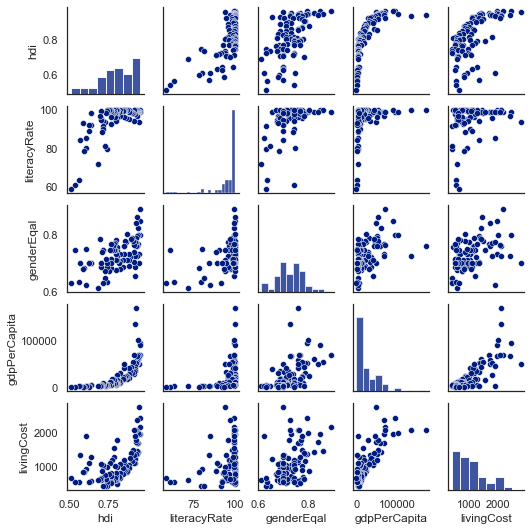

In [44]:
sns.pairplot(df[['hdi','literacyRate', 'genderEqal', 'gdpPerCapita', 'livingCost']], height=1.5)
plt.show()

Relationship between the living costs and gdp per capita based on the HDI tier

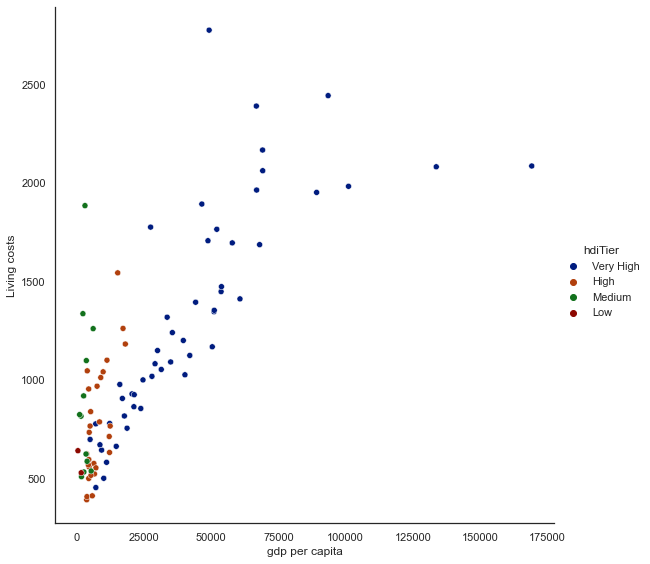

In [29]:
sns.relplot(data=df, x="gdpPerCapita", y="livingCost", hue="hdiTier",height=8).set_axis_labels('gdp per capita', 'Living costs');

What is the average gender equality rate and literacy rate group by tier hdi countries

In [30]:
df_genderHdiTier=df.groupby('hdiTier', as_index=False)['genderEqal', 'literacyRate'].mean().sort_values(by='genderEqal', ascending=False)
df_genderHdiTier['genderEqal']=(df_genderHdiTier['genderEqal']*100).round()
df_genderHdiTier['literacyRate']=(df_genderHdiTier['literacyRate']).round()
df_genderHdiTier.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_340\1195978896.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_genderHdiTier=df.groupby('hdiTier', as_index=False)['genderEqal', 'literacyRate'].mean().sort_values(by='genderEqal', ascending=False)


,hdiTier,genderEqal,literacyRate
3,Very High,75.0,98.0
0,High,71.0,96.0
2,Medium,69.0,85.0
1,Low,69.0,60.0


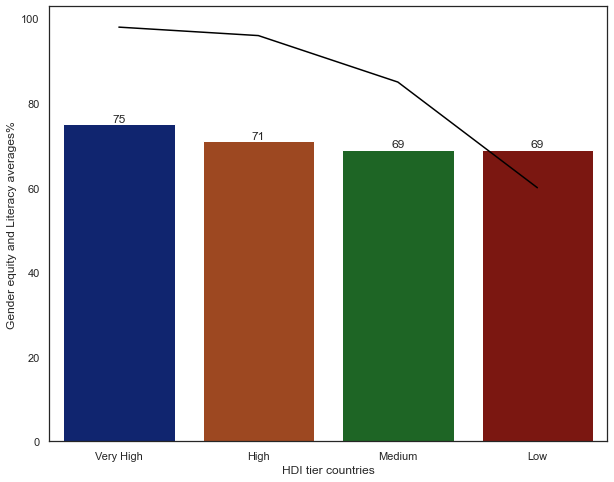

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
ax1 = sns.lineplot(
    x='hdiTier', 
    y='literacyRate', data=df_genderHdiTier,  sort=False, color='black')
sns.barplot(x="hdiTier", y="genderEqal", data=df_genderHdiTier, ax = ax1)
ax1.set(ylabel="Gender equity and Literacy averages%",
       xlabel="HDI tier countries")
for i in ax.containers:
    ax.bar_label(i,)
plt.show();

Distribution of the hdi among region taking into consideration the gdp per capita

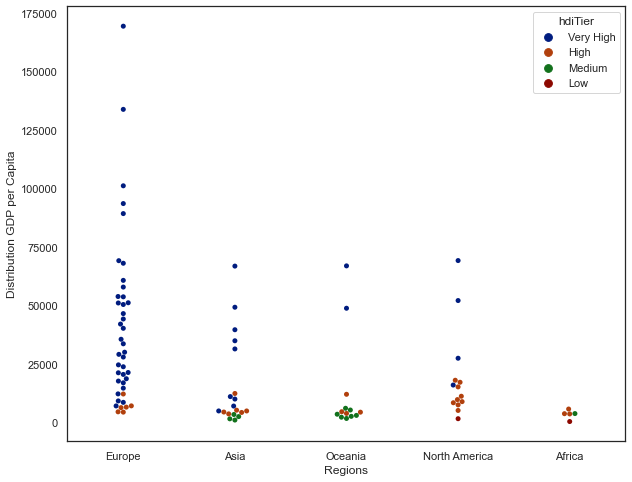

In [32]:
f, ax = plt.subplots(figsize=(10, 8))
g = sns.swarmplot(
    data=df,
    x="region", y="gdpPerCapita", hue="hdiTier",
)
ax.set(ylabel="Distribution GDP per Capita",
       xlabel="Regions");

Distribution of the hdi by area and population of the country

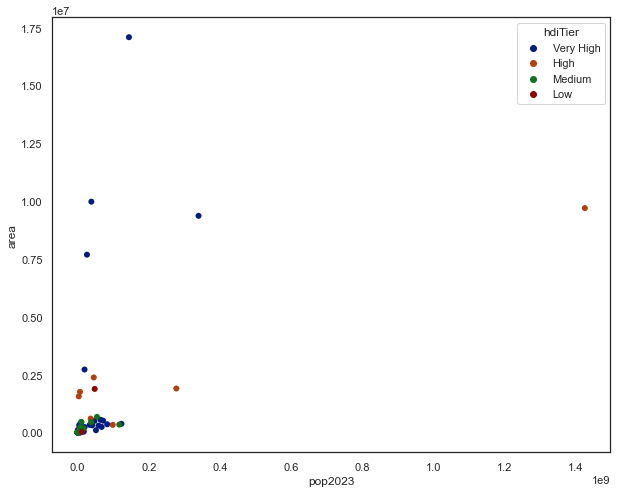

In [33]:
f, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="pop2023", y="area",
                hue="hdiTier", palette="dark",
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax);

Top 10 countries with highest hdi and gdp per capita

In [34]:
dfTop10=df.nlargest(10, ['hdi'])
dfTop10=dfTop10[['country', 'hdi','gdpPerCapita']]
dfTop10['hdi']=(dfTop10['hdi']*100).round()
dfTop10

,country,hdi,gdpPerCapita
0,Switzerland,96.0,93525.0
1,Norway,96.0,89242.0
2,Iceland,96.0,69133.0
3,Hong Kong,95.0,49259.0
4,Australia,95.0,66916.0
5,Denmark,95.0,68037.0
6,Sweden,95.0,60730.0
7,Ireland,94.0,101109.0
8,Germany,94.0,51073.0
9,Netherlands,94.0,57871.0


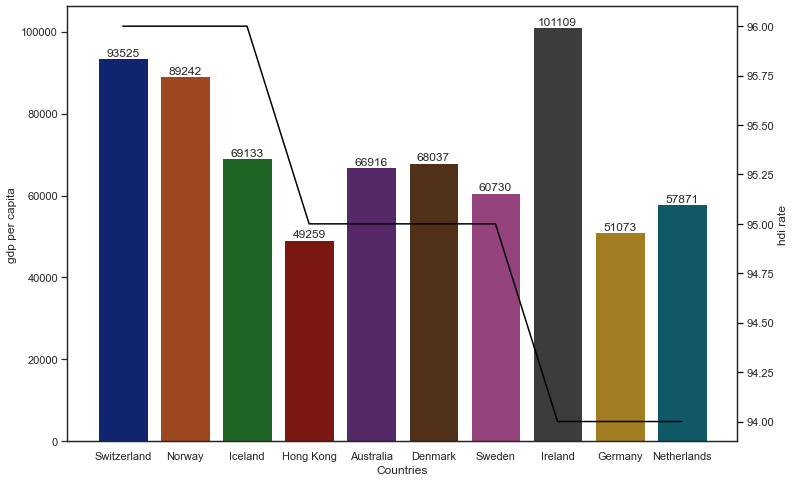

In [35]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax2=sns.barplot(x="country", y='gdpPerCapita', data=dfTop10)
ax1.set(ylabel="gdp per capita", xlabel="Countries")
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2=sns.lineplot(x='country',y='hdi', data=dfTop10,  sort=False, color='black')
ax2.set(ylabel="hdi rate")
ax2.tick_params(axis='y', color='black')
for i in ax1.containers:
    ax1.bar_label(i,)
plt.show();

10 countries with lowest hdi and gdp per capita

In [36]:
dfWorst10=df.nsmallest(10, ['hdi'])
dfWorst10=dfWorst10[['country', 'hdi','gdpPerCapita']]
dfWorst10['hdi']=(dfWorst10['hdi']*100).round()
dfWorst10

,country,hdi,gdpPerCapita
92,Sudan,51.0,453.0
91,Haiti,54.0,1664.0
90,Papua New Guinea,56.0,2673.0
89,Solomon Islands,56.0,2306.0
88,Myanmar,58.0,1089.0
87,Cambodia,59.0,1608.0
85,Laos,61.0,2569.0
86,Vanuatu,61.0,3073.0
84,Kiribati,62.0,1765.0
83,Micronesia,63.0,3573.0


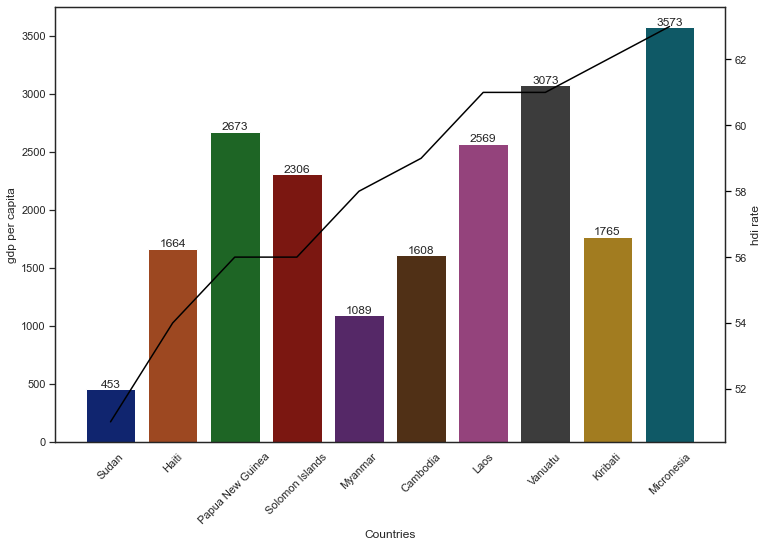

In [37]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax2=sns.barplot(x="country", y='gdpPerCapita', data=dfWorst10)
ax1.set(ylabel="gdp per capita", xlabel="Countries")
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2=sns.lineplot(x='country',y='hdi', data=dfWorst10,  sort=False, color='black')
ax2.set(ylabel="hdi rate")
ax2.tick_params(axis='y', color='black')
for i in ax1.containers:
    ax1.bar_label(i,)
for j in ax1.get_xticklabels():
    j.set_rotation(45)
plt.show();